In [277]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [349]:
def affichage(dic):
    for i, (title, img) in enumerate(dic.items()):
        if i % 2 == 0:
            plt.figure(figsize=(40, 40))
        plt.subplot(1, 2, i % 2 + 1)
        plt.imshow(img, cmap='gray')
        plt.title(title, fontsize=40)
        plt.axis('off')
        if i % 2 == 1 or i == len(dic) - 1:
            plt.tight_layout()
            plt.show()

NameError: name 'index' is not defined

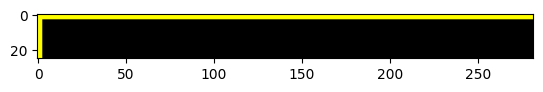

In [333]:

image_original = cv2.imread('images/image-0064.png')

#plt.imshow(cv2.GaussianBlur(image, (5, 5), 0))
#plt.imshow(cv2.medianBlur(image, 5))
#cv2.bilateralFilter(image, 9, 75, 75)

image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

_, binary = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)


contours, hierarchy = cv2.findContours(
    binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)
drawing = np.zeros((gray.shape[0], gray.shape[1], 3), dtype=np.uint8)
CountersImg = cv2.drawContours(drawing, contours, -1, (255, 255, 0), 3)
plt.imshow(CountersImg, cmap = 'grey')

In [301]:
im0971_or = cv2.imread('images/image-0971.png')
im0088_or = cv2.imread('images/image-0088.png')
im0851_or = cv2.imread('images/image-0851.png')
im0479_or = cv2.imread('images/image-0479.png')

im0971 = cv2.cvtColor(im0971_or, cv2.COLOR_BGR2GRAY)
im0088 = cv2.cvtColor(im0088_or, cv2.COLOR_BGR2GRAY)
im0851 = cv2.cvtColor(im0851_or, cv2.COLOR_BGR2GRAY)
im0479 = cv2.cvtColor(im0479_or, cv2.COLOR_BGR2GRAY)


li_antiqua_before = []

im0064 = image[230:260, 740:1040] #0064
im0088 = im0088[245:280, 770:1025] #0088
im0971 = im0971[220:245, 400:682] #0971
im0851 = im0851[230:265, 440:750] #0851
im0479 = im0479[210:240, 340:700] # 0479

li_gros_antiqua = [im0064, im0088, im0971, im0851, im0479] #etiquette grossière sur image originale
li_antiqua_before = []

# Suppression des lignes complètement blanches
for imagetest in li_gros_antiqua:
    lignes_a_conserver = ~np.all(imagetest == 255, axis=1)
    imagecut = imagetest[lignes_a_conserver]
    li_antiqua_before.append(imagecut)  #etiquette grossière sans ligne blanche sur image originale




[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [291]:
def cosine(a,b):
    return dot(a,b)/(norm(a)*norm(b))

In [334]:
#liste vulgata nova
li_vulgata_original = []

im0971_or = cv2.imread('images/image-0971.png')
im0088_or = cv2.imread('images/image-0088.png')
im0851_or = cv2.imread('images/image-0851.png')
im0479_or = cv2.imread('images/image-0479.png')
im0064_or = cv2.imread('images/image-0064.png')


im0971 = cv2.cvtColor(im0971_or, cv2.COLOR_BGR2GRAY)
im0088 = cv2.cvtColor(im0088_or, cv2.COLOR_BGR2GRAY)
im0851 = cv2.cvtColor(im0851_or, cv2.COLOR_BGR2GRAY)
im0479 = cv2.cvtColor(im0479_or, cv2.COLOR_BGR2GRAY)
im0064 = cv2.cvtColor(im0064_or, cv2.COLOR_BGR2GRAY)


li_vulgata_original.append(im0064[230:260, 270:550])
li_vulgata_original.append(im0088[240:280, 300:550])
li_vulgata_original.append(im0851[240:270, 950:1200])
li_vulgata_original.append(im0479[210:235, 900:1150])
li_vulgata_original.append(im0971[220:250, 910:1150])





In [335]:
import cv2
import numpy as np

def image_cut(img): #récupère etiquette de texte original la plus fine a partir d'une etiquette grossière, 
    #l'image doit etre donnée deja en noir et blanc
    #prétraitement
    _, binary = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    dilated = cv2.dilate(binary, kernel, iterations=1)

    #suppression lignes totalement blanches
    masque_lignes = ~np.all(dilated == 255, axis=1)
    lignes_texte = np.where(masque_lignes)[0]

    if len(lignes_texte) == 0:
        return img  # pas de texte détecté

    img_lignes = dilated[lignes_texte[0]:lignes_texte[-1]+1, :]

    #suppression des colonnes totalement blanches
    masque_colonnes = ~np.all(img_lignes == 255, axis=0)
    colonnes_texte = np.where(masque_colonnes)[0]

    a = lignes_texte[0]
    a_bis = lignes_texte[-1] + 1
    b = colonnes_texte[0]
    b_bis = colonnes_texte[-1] + 1

    imgfinale = img[a: a_bis, b : b_bis] #memes coord que le rectangle trouvé mais sur image originale

    return imgfinale


In [306]:
li_antiqua = [image_cut(li_antiqua_before[k]) for k in range(len(li_antiqua_before))]
li_vulgata = [image_cut(li_vulgata_original[k]) for k in range(len(li_vulgata_original))]



In [294]:
def cos_resize(elem):
    _, thresh = cv2.threshold(elem, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    cropped = thresh.astype(np.float32) / 255.
    cropped =  (elem - np.mean(elem)) / (np.std(elem) + 1e-6)
    cropped = cv2.resize(cropped, (224, 24), interpolation=cv2.INTER_AREA)
    return cropped

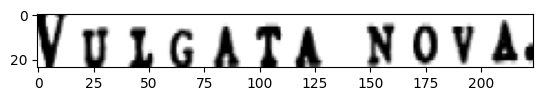

In [330]:
plt.imshow(cos_resize(li_vulgata[2]),cmap = 'grey')


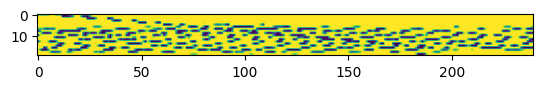

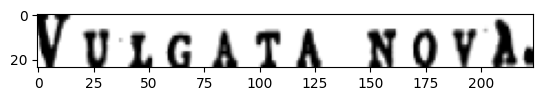

In [317]:
plt.imshow(cos_resize(li_vulgata[3]),cmap = 'grey')

In [307]:
li_antiqua_cosine = []

for i in range(len(li_antiqua)-1):
    for j in range(i+1, len(li_antiqua)):
        li_antiqua_cosine.append(cosine(cos_resize(li_antiqua[i]).flatten(), cos_resize(li_antiqua[j]).flatten()))


li_vulgata_cosine = []

for i in range(len(li_vulgata)-1):
    for j in range(i+1, len(li_vulgata)):
        li_vulgata_cosine.append(cosine(cos_resize(li_vulgata[i]).flatten(), cos_resize(li_antiqua[j]).flatten()))

vulgata_antiqua = []
for elem1 in li_antiqua:
    for elem2 in li_vulgata:
        vulgata_antiqua.append(cosine(cos_resize(elem1).flatten(), cos_resize(elem2).flatten()))


        

In [316]:
print(vulgata_antiqua)


[np.float64(0.08836182690080982), np.float64(0.12376278215830681), np.float64(0.13104634306100593), np.float64(0.14256594383200163), np.float64(0.18580037408150912), np.float64(-0.05756189479475738), np.float64(-0.029155969943223805), np.float64(0.009291514698563373), np.float64(-0.01304403271740848), np.float64(0.12741418235801374), np.float64(-0.004583837421280329), np.float64(0.00031041073941702474), np.float64(0.10076167770155436), np.float64(0.08699519386749256), np.float64(0.09528510992356504), np.float64(0.07735958868333165), np.float64(0.11190998150801387), np.float64(0.14966575599358442), np.float64(0.13427191783586162), np.float64(0.1826742275159721), np.float64(0.050548010547736937), np.float64(0.10209531528466133), np.float64(0.12044323671804227), np.float64(0.0970962616624163), np.float64(0.21960114095079095)]


In [220]:
print(li_antiqua_cosine)

[np.float32(0.44631347), np.float32(0.41943935), np.float32(0.65108854), np.float32(0.5505626), np.float32(0.517897), np.float32(0.49722144), np.float32(0.4306118), np.float32(0.4279638), np.float32(0.30056465), np.float32(0.67327267)]


In [344]:
im0184_or = cv2.imread('images/image-0184.png')
imgtest = cv2.cvtColor(im0184_or[260:290, 750:1000], cv2.COLOR_BGR2GRAY)
imgtest = image_cut(imgtest)
imgtest = cos_resize(imgtest)


cosine_test_antiqua = []
cosine_test_vulgata = []
for i in range(len(li_antiqua)):
    cosine_test_antiqua.append(cosine(imgtest.flatten(), cos_resize(li_antiqua[i]).flatten()))
    cosine_test_vulgata.append(cosine(imgtest.flatten(), cos_resize(li_vulgata[i]).flatten()))



In [336]:
print(cosine_test_vulgata)

[np.float64(0.09200776838506299), np.float64(0.21488788052004673), np.float64(0.23199815696765066), np.float64(0.20933990352196663), np.float64(0.18078924800459298)]


In [345]:
def test_etiquette(img): 
    #donne appartenance de l'étiquette à antiqua ou vulgata pour une image deja en noir et blanc
    test = image_cut(img)
    test = cos_resize(test)
    
    cosine_test_antiqua = []
    cosine_test_vulgata = []
    for i in range(len(li_antiqua)):
        cosine_test_antiqua.append(cosine(test.flatten(), cos_resize(li_antiqua[i]).flatten()))
        cosine_test_vulgata.append(cosine(test.flatten(), cos_resize(li_vulgata[i]).flatten()))

    max_antiqua = np.max(cosine_test_antiqua)
    max_vulgata = np.max(cosine_test_vulgata)

    if max_antiqua > max_vulgata:
        return "versio antiqua"

    return "vulgata nova"


In [348]:
im0184_or = cv2.imread('images/image-0184.png')
imgtest = cv2.cvtColor(im0184_or[260:290, 750:1000], cv2.COLOR_BGR2GRAY)

test_etiquette(li_antiqua[2])


'versio antiqua'